# Exploratory Data Analysis

In this notebook, the first exploratory data analysis is done for the given data. 

In [11]:
# Import packages
import string
from random import randint

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

stop = stopwords.words("english")

In [2]:
# Read data
df = pd.read_json('../Data/data.json')

## Data exploration 

In [3]:
df.head()

,level,description,title
0,Entry Level,OUTFITTERY is Europe’s biggest Personal Shoppi...,Frontend Engineer (m/f)
1,Senior Level,OUTFITTERY is Europe’s biggest Personal Shoppi...,Senior Product Manager (m/f)
2,Entry Level,JOB DESCRIPTION\nPamet is looking for Android ...,Android Developer
3,Senior Level,We are looking for a Development Lead with 5+ ...,Development Lead
4,Entry Level,JOB DESCRIPTION\nPamet is looking for a IBM We...,IBM WebSphere Portal Developer


In [4]:
# Check null values
print(f"Missing values? {df.isnull().values.any()}\n")

# Count null values
# Since we have both the test set(without the levels) and the train set here. 
print(df.isnull().sum())

Missing values? True

level          75
description     0
title           0
dtype: int64


In [5]:
# Total entries
df.shape[0]

216

In [6]:
# Split dataset without labels (levels) as test set and the remaining set as training set
test_df = df[df['level'].isnull()]

# Reset index
test_df.reset_index(inplace=True)

# Drop test set from entire dataset
df.dropna(inplace=True)

print(f"Test set size: {test_df.shape[0]}")
print(f"Train set size: {df.shape[0]}")

Test set size: 75
Train set size: 141


In [31]:
# Look at some samples.
for i in range(3):
    sample = randint(0, df.shape[0])
    print(f"\n########## Sample {i} ##########")
    print("\n- LEVEL:")
    print(df['level'][sample])
    print("\n- TITLE:")
    print(df['title'][sample])
    print("\n- DESCRIPTION:")
    print(df['description'][sample])


########## Sample 0 ##########

- LEVEL:
Senior Level

- TITLE:
Senior Full-Stack Developer (remote)

- DESCRIPTION:
DescriptionInVision is the world’s leading design collaboration platform.We enable companies of all sizes to discover the power of design-driven product development. That’s why more than one million designers, product managers, marketers and other stakeholders at so many of the world's most loved startups, agencies, & corporations use InVision every day, including Uber, Evernote, Twitter, Adobe, Salesforce and many more.We are looking for well rounded Senior Full-Stack Developer to join the InVision engineering team. The ideal candidate will have a **deep** understanding of software architecture and a demonstrated skill at coding effectively across a multitude of languages. The candidate will be responsible for enhancing and extending our service offering while at the same time maintaining performance and robustness.The candidate should have an exacting eye for detail a

In [33]:
sample = 5
print("\n- LEVEL:")
print(test_df['level'][sample])
print("\n- TITLE:")
print(test_df['title'][sample])
print("\n- DESCRIPTION:")
print(test_df['description'][sample])


- LEVEL:
nan

- TITLE:
Praktikant im Bereich Operations & Customer Service

- DESCRIPTION:
no


By looking at the description text, we see that there are some preprocessing steps required before ingesting the data.

1. remove new lines character "\n",
2. remove all symbols "-.,",
3. convert text to lowercase,
4. remove stopwords,
5. remove "description" or "job description" or "Job Purpose" or "No description available",
6. handle abbreviations (e.g., "sr.", "jr."),
7. check language (e.g., German, English or French) and translate it if required,
8. split combined words,
9. check spelling,
10. replace numbers with words (e.g., "3 years" into "three years").

## Data Vizualization 

### Levels distribution

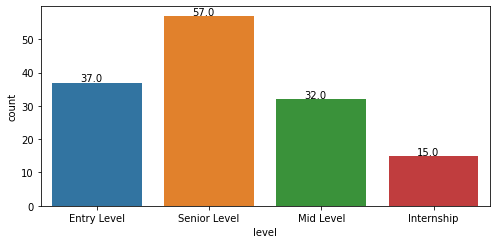

In [27]:
# Plot setting
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Histogram of Level
ax = sns.countplot(x="level", data=df)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.3))

plt.show()

From the above plot, it can be inferred that the dataset is imbalanced!

#### Most common words in description and title fields

In [29]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['description_without_stopwords'] = df['description'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Look at the most common words from the description
pd.Series(' '.join(df['description_without_stopwords']).lower().split()).value_counts()[: 20]

team           238
experience     202
work           195
-              190
you            156
product        155
we             124
business       112
company        108
&               99
new             98
working         96
marketing       96
design          92
development     91
looking         84
great           80
strong          79
job             71
a               71
dtype: int64

In [30]:
df['title_without_stopwords'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#to look at the most common words from the title
pd.Series(' '.join(df['title_without_stopwords']).lower().split()).value_counts()[: 20]

-              35
manager        29
engineer       24
senior         16
developer      15
business       15
intern         14
(m/f)          12
sales          10
manager,       10
(f/m)           9
product         9
india           9
development     9
software        9
marketing       7
qa              7
&               6
head            6
lead            6
dtype: int64

From the above step, we can see that the title column has some important key words like senior, intern which could be helpful in prediction.